<a href="https://colab.research.google.com/github/Shahrukh2016/Linear_Regression_Implimentation/blob/main/MultilinearRegression_50Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Algorithms Shahrukh/Datasets/50_Startups.csv")

In [4]:
df.shape

(50, 5)

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Text(0, 0.5, 'Profit')

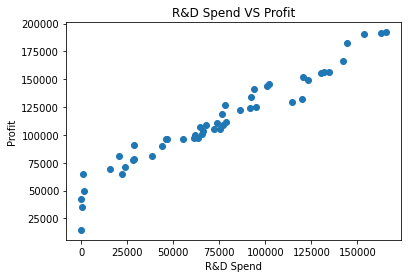

In [8]:
plt.scatter(df["R&D Spend"], df["Profit"])
plt.title("R&D Spend VS Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

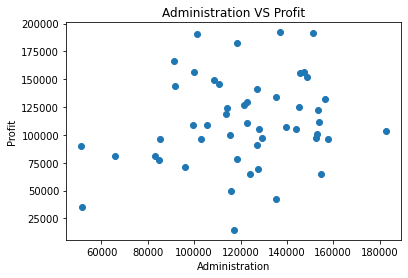

In [9]:
plt.scatter(df["Administration"], df["Profit"])
plt.title("Administration VS Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

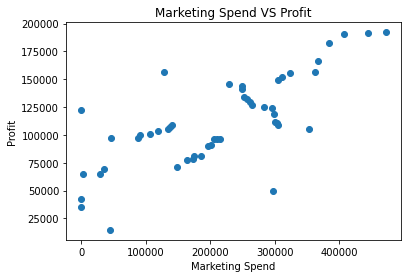

In [10]:
plt.scatter(df["Marketing Spend"], df["Profit"])
plt.title("Marketing Spend VS Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
df_new= df.copy()

In [13]:
dummy= pd.get_dummies(df["State"])

In [14]:
df_conc= pd.concat([df_new, dummy],axis=1)

In [15]:
df_conc.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [16]:
df_conc.drop(columns=["State"], axis=1, inplace=True)

In [17]:
df_conc.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


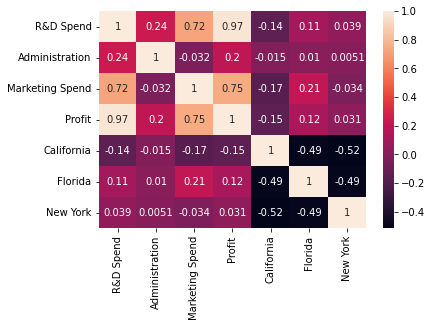

In [38]:
sns.heatmap(df_conc.corr(), annot=True)

In [18]:
dependent_variable= "Profit"
independent_variable= [i for i in df_conc.columns if i != "Profit"]
print(dependent_variable)
print(independent_variable)

Profit
['R&D Spend', 'Administration', 'Marketing Spend', 'California', 'Florida', 'New York']


In [19]:
x= df_conc[independent_variable]
y= df_conc[[dependent_variable]]
print(x.shape)
print(y.shape)

(50, 6)
(50, 1)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
x_train

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0
7,130298.13,145530.06,323876.68,0,1,0
14,119943.24,156547.42,256512.92,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1


In [23]:
x_test

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
28,66051.52,182645.56,118148.20,0,1,0
11,100671.96,91790.61,249744.55,1,0,0
10,101913.08,110594.11,229160.95,0,1,0
41,27892.92,84710.77,164470.71,0,1,0
2,153441.51,101145.55,407934.54,0,1,0
27,72107.60,127864.55,353183.81,0,0,1
38,20229.59,65947.93,185265.10,0,0,1
31,61136.38,152701.92,88218.23,0,0,1
22,73994.56,122782.75,303319.26,0,1,0
4,142107.34,91391.77,366168.42,0,1,0


In [24]:
y_train

,Profit
33,96778.92
35,96479.51
26,105733.54
34,96712.80
18,124266.90
7,155752.60
14,132602.65
45,64926.08
48,35673.41
29,101004.64


In [25]:
y_test

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 6), (10, 6), (40, 1), (10, 1))

In [27]:
transform= MinMaxScaler()
x_train= transform.fit_transform(x_train)
x_test= transform.transform(x_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
#Predicting the y dependent variable
y_pred= regressor.predict(x_test)

In [31]:
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

Now its time to check the accuracy of our model

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
mae= mean_absolute_error(y_test, y_pred)
print(mae)

7514.2936596406


In [34]:
mse= mean_squared_error(y_test,y_pred)
print(mse)

83502864.03257725


In [36]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

9137.990152794937


In [37]:
r2= r2_score(y_test, y_pred)
print(r2)

0.9347068473282426


Since r2 score is excellent this means that our model is working well for testing dataset.